In [1]:
pip install galpy

Importing all the needed packages

In [1]:

import numpy as np
import pylab as pl
import astropy.units as u
from galpy.orbit import Orbit
import galpy.util.coords as coords
from galpy.potential import MWPotential2014

Creating the velocity ellipsoid for white dwarfs (Table 2 from [Torres et al. 2019, MNRAS, 485, 5573-5589](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.5573T/abstract)), then plotting a random selection of velocities in a Toomre diagram, and convering one for each into cylindrical coordinates:

[-29.61250893  -9.71734623 -13.25408079]
[-15.13996698 -67.31482702 -65.41554216]
[ -65.31677031 -125.64291808   58.54636092]
<ipython-input-24-cd66e97c5738>:20: RuntimeWarning: invalid value encountered in sqrt
  ax1.plot(nUVW_halo[:,1],np.sqrt(nUVW_halo[:,0]**2 + nUVW_halo[:,2]), marker='.', ms=3, ls='none', label='halo')

<ipython-input-24-cd66e97c5738>:21: RuntimeWarning: invalid value encountered in sqrt
  ax1.plot(nUVW_thick[:,1],np.sqrt(nUVW_thick[:,0]**2 + nUVW_thick[:,2]), marker='.', ms=3, ls='none', label='thick disk')

<ipython-input-24-cd66e97c5738>:22: RuntimeWarning: invalid value encountered in sqrt
  ax1.plot(nUVW_thin[:,1],np.sqrt(nUVW_thin[:,0]**2 + nUVW_thin[:,2]), marker='.', ms=3, ls='none', label='thin disk')



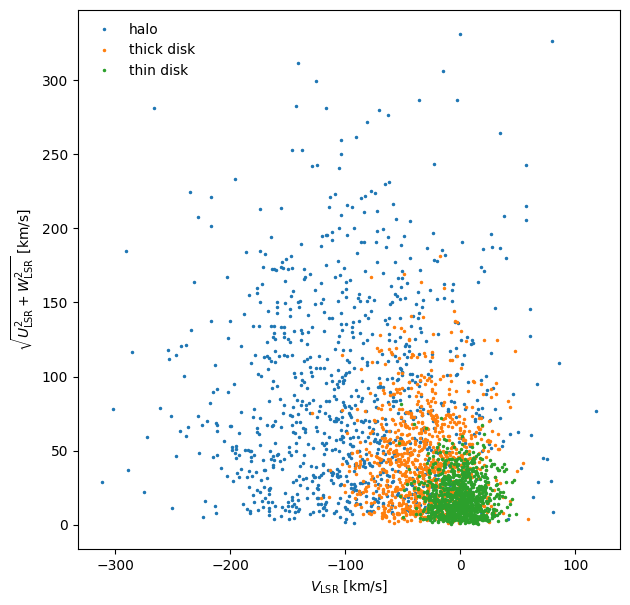

In [24]:
#np.random.seed(0)

# velocity ellipsoid
UVW_thin = np.array([[2.5,22.5],[-1.4,17.4],[2.6,16.2]])
UVW_thick = np.array([[-18.6,50.4],[-30.0,29.3],[1.1,33.1]])
UVW_halo = np.array([[-27.3,100.8],[-92.3,67.4],[3.4,66.9]])

nUVW_thin = np.random.normal(UVW_thin[:,0],UVW_thin[:,1],(1000,3))
nUVW_thick = np.random.normal(UVW_thick[:,0],UVW_thick[:,1],(1000,3))
nUVW_halo = np.random.normal(UVW_halo[:,0],UVW_halo[:,1],(1000,3))

print(nUVW_thin[0])
print(nUVW_thick[0])
print(nUVW_halo[0])

fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.plot(nUVW_halo[:,1],np.sqrt(nUVW_halo[:,0]**2 + nUVW_halo[:,2]), marker='.', ms=3, ls='none', label='halo')
ax1.plot(nUVW_thick[:,1],np.sqrt(nUVW_thick[:,0]**2 + nUVW_thick[:,2]), marker='.', ms=3, ls='none', label='thick disk')
ax1.plot(nUVW_thin[:,1],np.sqrt(nUVW_thin[:,0]**2 + nUVW_thin[:,2]), marker='.', ms=3, ls='none', label='thin disk')

ax1.set_xlabel(r'$V_{\rm LSR}$ [km/s]')
ax1.set_ylabel(r'$\sqrt{U^2_{\rm LSR} + W^2_{\rm LSR}}$ [km/s]')

pl.legend(frameon=False)


pl.show()

XYZ = [8.030,0.0,0.0]
RTZ_thin = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_thin = coords.rect_to_cyl_vec(nUVW_thin[0,0],nUVW_thin[0,1],nUVW_thin[0,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

RTZ_thick = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_thick = coords.rect_to_cyl_vec(nUVW_thick[0,0],nUVW_thick[0,1],nUVW_thick[0,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

RTZ_halo = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_halo = coords.rect_to_cyl_vec(nUVW_halo[0,0],nUVW_halo[0,1],nUVW_halo[0,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)


We create three orbits for thin-disk, thick-disk, and halo white dwarfs, respectively. Then we create an array of timesteps
And finally we integrate the orbits.

In [25]:
R0, z0, V0, v_sun = 8.122*u.kpc, 0.0208*u.kpc, 235.*u.km/u.s, [12.9, 10.6, 7.78]*u.km / u.s

star_thin = [RTZ_thin[0]/8.,vRTZ_thin[0]/220,1+vRTZ_thin[1]/220,RTZ_thin[2]/8,vRTZ_thin[2]/220,RTZ_thin[1]]
print(star_thin)
star_thick = [RTZ_thick[0]/8.,vRTZ_thick[0]/220,1+vRTZ_thick[1]/220,RTZ_thick[2]/8,vRTZ_thick[2]/220,RTZ_thick[1]]
print(star_thick)
star_halo = [RTZ_halo[0]/8.,vRTZ_halo[0]/220,1+vRTZ_halo[1]/220,RTZ_halo[2]/8,vRTZ_halo[2]/220,RTZ_halo[1]]
print(star_halo)

ts = np.linspace(0,0.125,10000)*u.Gyr

o_thin = Orbit(star_thin, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thin.integrate(ts,MWPotential2014)

o_thick = Orbit(star_thick, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thick.integrate(ts,MWPotential2014)

o_halo = Orbit(star_halo, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_halo.integrate(ts,MWPotential2014)


# printing eccentricity and angular momentum (z component)
print('e = ', round(o_thin.e(),3), 'Lz = ', o_thin.Lz(quantity=True))
print('e = ', round(o_thick.e(),3), 'Lz = ', o_thick.Lz(quantity=True))
print('e = ', round(o_halo.e(),3), 'Lz = ', o_halo.Lz(quantity=True))


[1.00375, -0.13460231330402278, 0.9558302443999898, 0.0, -0.060245821765887254, 0.0]
[1.00375, -0.0688180317263575, 0.6940235135668567, 0.0, -0.2973433734601311, 0.0]
[1.00375, -0.29689441049217025, 0.4288958269227552, 0.0, 0.26611982237151904, 0.0]
e =  0.11 Lz =  1831.2058795010994 km kpc / s
e =  0.296 Lz =  1329.629341613301 km kpc / s
e =  0.598 Lz =  821.6904252150526 km kpc / s


Plotting the orbits

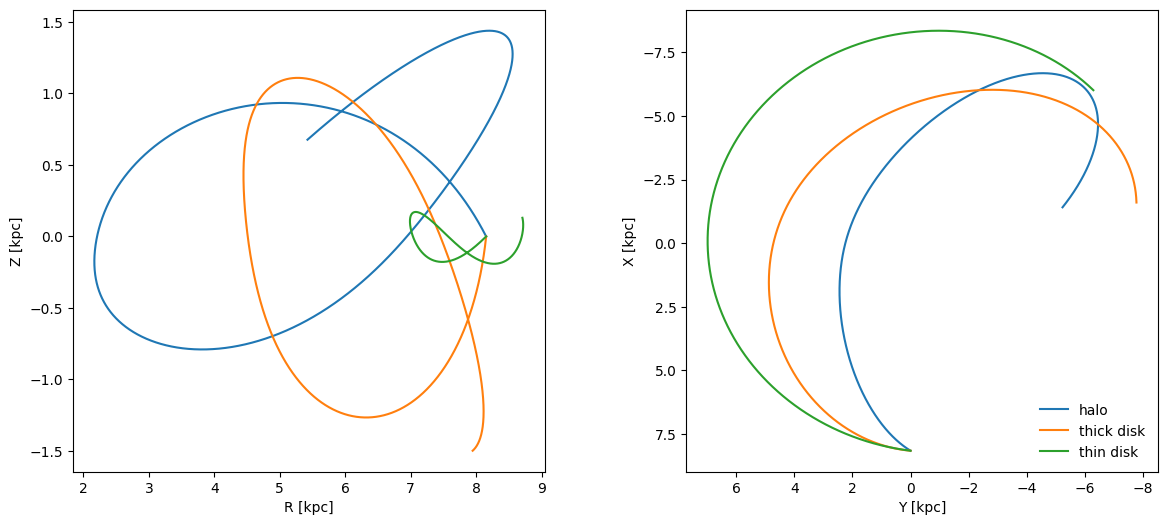

In [26]:
fig = pl.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.z(ts,quantity=True))
ax1.plot(o_thick.R(ts,quantity=True),o_thick.z(ts,quantity=True))
ax1.plot(o_thin.R(ts,quantity=True),o_thin.z(ts,quantity=True))


ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('Z [kpc]')


ax2 = fig.add_subplot(122)

ax2.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), label='halo')
ax2.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), label='thick disk')
ax2.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), label='thin disk')

ax2.set_xlabel('Y [kpc]')
ax2.set_ylabel('X [kpc]')

pl.legend(frameon=False)

ax2.invert_xaxis()
ax2.invert_yaxis()
pl.show()


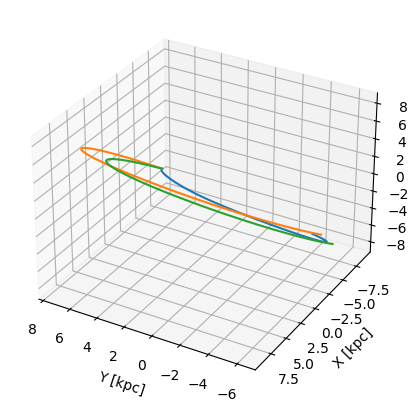

In [16]:
fig = pl.figure(figsize=(5,5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(projection='3d')

ax1.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), o_halo.x(ts,quantity=True), label='halo')
ax1.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), o_thick.x(ts,quantity=True), label='thick disk')
ax1.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), o_thin.x(ts,quantity=True), label='thin disk')


ax1.set_xlabel('Y [kpc]')
ax1.set_ylabel('X [kpc]')
ax1.set_zlabel('Z [kpc]')

ax1.invert_xaxis()
ax1.invert_yaxis()
pl.show()

Integrating for longer and plotting the orbits

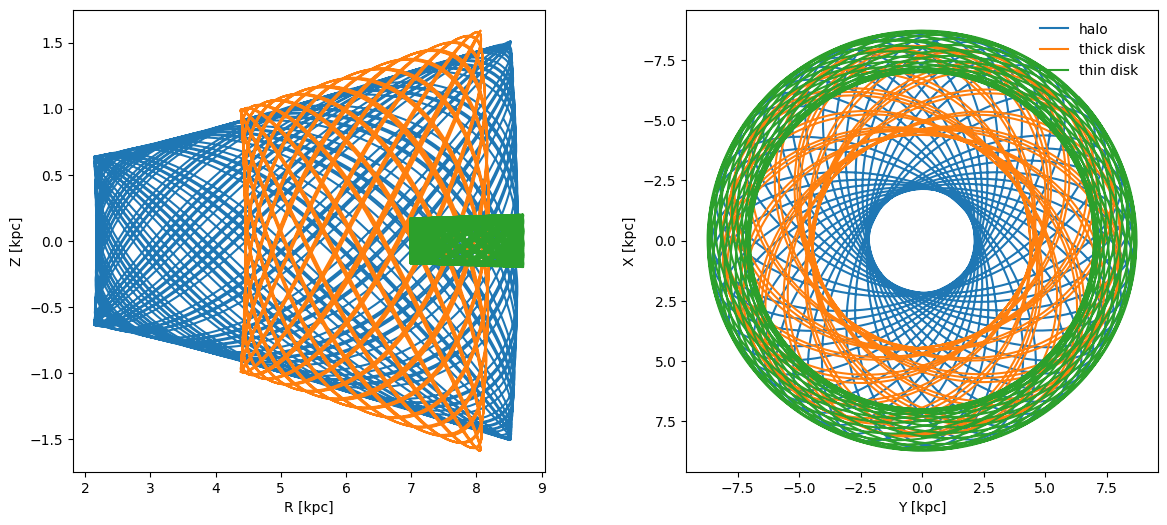

In [27]:
ts = np.linspace(0,5,10000)*u.Gyr


o_thin.integrate(ts,MWPotential2014)

o_thick.integrate(ts,MWPotential2014)

o_halo.integrate(ts,MWPotential2014)



fig = pl.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.z(ts,quantity=True))
ax1.plot(o_thick.R(ts,quantity=True),o_thick.z(ts,quantity=True))
ax1.plot(o_thin.R(ts,quantity=True),o_thin.z(ts,quantity=True))

ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('Z [kpc]')


ax2 = fig.add_subplot(122)

ax2.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), label='halo')
ax2.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), label='thick disk')
ax2.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), label='thin disk')

ax2.set_xlabel('Y [kpc]')
ax2.set_ylabel('X [kpc]')

pl.legend(frameon=False)

ax2.invert_yaxis()
pl.show()




Plotting the Galactic radial velocity component:

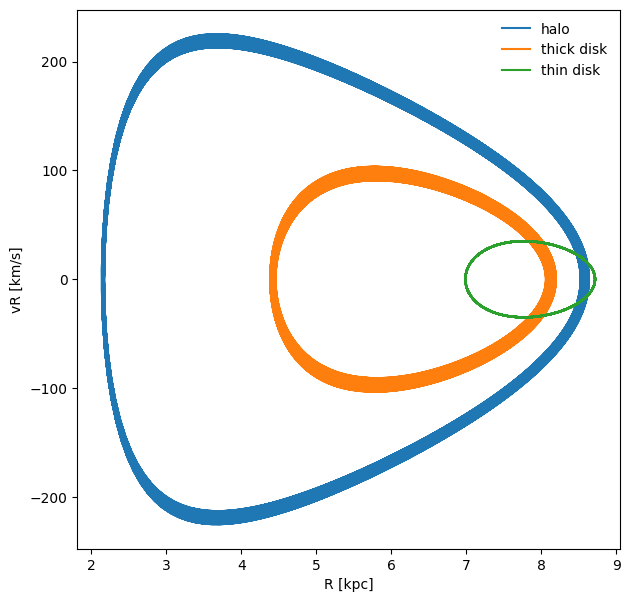

In [29]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.plot(o_halo.R(ts,quantity=True),o_halo.vR(ts,quantity=True), label='halo')
ax1.plot(o_thick.R(ts,quantity=True),o_thick.vR(ts,quantity=True), label='thick disk')
ax1.plot(o_thin.R(ts,quantity=True),o_thin.vR(ts,quantity=True), label='thin disk')

pl.legend(frameon=False)

ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('vR [km/s]')
pl.show()